In [9]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip both archives
archives = {
    "archive (3).zip": "unzipped_archive_3",
    "archive (4).zip": "unzipped_archive_4"
}

for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")

# Step 2: Clean each CSV
for name, folder in archives.items():
    print(f"\n🧹 Cleaning files in: {folder}")
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]

    if not csv_files:
        print("❌ No CSV files found.")
        continue

    for csv_file in csv_files:
        file_path = os.path.join(folder, csv_file)
        print(f"\n📄 Cleaning file: {csv_file}")
        try:
            df = pd.read_csv(file_path)

            # Drop completely empty rows or columns
            df.dropna(axis=0, how='all', inplace=True)
            df.dropna(axis=1, how='all', inplace=True)

            # Clean column names
            df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

            # Drop duplicate rows
            df.drop_duplicates(inplace=True)

            # Try converting columns to appropriate data types
            df = df.convert_dtypes()

            # Handle remaining missing values: fill with "unknown" for object cols, median/mean for numerics
            for col in df.columns:
                if df[col].isna().sum() > 0:
                    if df[col].dtype == "string" or df[col].dtype == "object":
                        df[col].fillna("unknown", inplace=True)
                    elif pd.api.types.is_numeric_dtype(df[col]):
                        df[col].fillna(df[col].median(), inplace=True)

            # Save cleaned file
            cleaned_name = f"cleaned_{csv_file}"
            cleaned_path = os.path.join(folder, cleaned_name)
            df.to_csv(cleaned_path, index=False)
            print(f"✅ Saved cleaned file as: {cleaned_path}")

        except Exception as e:
            print(f"⚠️ Could not process {csv_file}: {e}")


✅ Extracted 'archive (3).zip' to 'C:\Users\malyk\unzipped_archive_3'
✅ Extracted 'archive (4).zip' to 'C:\Users\malyk\unzipped_archive_4'

🧹 Cleaning files in: unzipped_archive_3

📄 Cleaning file: cleaned_cleaned_cleaned_Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_cleaned_cleaned_cleaned_Students Social Media Addiction.csv

📄 Cleaning file: cleaned_cleaned_Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_cleaned_cleaned_Students Social Media Addiction.csv

📄 Cleaning file: cleaned_Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_cleaned_Students Social Media Addiction.csv

📄 Cleaning file: Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_Students Social Media Addiction.csv

🧹 Cleaning files in: unzipped_archive_4

📄 Cleaning file: cleaned_cleaned_cleaned_cleaned_social_media_usage.csv
✅ Saved cleaned file as: unzipped_archive_4

In [11]:
import pandas as pd
import os

folders = ["unzipped_archive_3", "unzipped_archive_4"]
filename = "cleaned_social_media_addiction.csv"

df = None
for folder in folders:
    file_path = os.path.join(folder, filename)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Loaded file from: {file_path}")
        print(df.head(10))
        break

if df is None:
    print(f"Error: File '{filename}' not found in folders: {folders}")
    print("Current working directory:", os.getcwd())
    for folder in folders:
        if os.path.exists(folder):
            print(f"Files in folder '{folder}':", os.listdir(folder))
        else:
            print(f"Folder '{folder}' does not exist.")


Error: File 'cleaned_social_media_addiction.csv' not found in folders: ['unzipped_archive_3', 'unzipped_archive_4']
Current working directory: C:\Users\malyk
Files in folder 'unzipped_archive_3': ['cleaned_cleaned_cleaned_cleaned_Students Social Media Addiction.csv', 'cleaned_cleaned_cleaned_Students Social Media Addiction.csv', 'cleaned_cleaned_Students Social Media Addiction.csv', 'cleaned_Students Social Media Addiction.csv', 'Students Social Media Addiction.csv']
Files in folder 'unzipped_archive_4': ['cleaned_cleaned_cleaned_cleaned_cleaned_social_media_usage.csv', 'cleaned_cleaned_cleaned_cleaned_social_media_usage.csv', 'cleaned_cleaned_cleaned_social_media_usage.csv', 'cleaned_cleaned_social_media_usage.csv', 'cleaned_social_media_usage.csv', 'social_media_usage.csv']


In [13]:
import pandas as pd
import os

files_to_load = {
    "unzipped_archive_3": "cleaned_Students Social Media Addiction.csv",
    "unzipped_archive_4": "cleaned_social_media_usage.csv"
}

dataframes = {}

for folder, filename in files_to_load.items():
    file_path = os.path.join(folder, filename)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes[folder] = df
        print(f"Loaded '{filename}' from folder '{folder}':")
        print(df.head(5))
    else:
        print(f"Error: File '{filename}' does not exist at path: {file_path}")

# Now you have:
# dataframes['unzipped_archive_3'] with Students Social Media Addiction data
# dataframes['unzipped_archive_4'] with Social Media Usage data


Loaded 'cleaned_Students Social Media Addiction.csv' from folder 'unzipped_archive_3':
   student_id  age  gender academic_level     country  avg_daily_usage_hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  most_used_platform affects_academic_performance  sleep_hours_per_night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes   

In [17]:
import os
import pandas as pd

files_to_load = {
    "unzipped_archive_3": "cleaned_Students Social Media Addiction.csv",
    "unzipped_archive_4": "social_media_usage.csv"
}

dataframes = {}

for folder, filename in files_to_load.items():
    file_path = os.path.join(folder, filename)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes[folder] = df
        print(f"Loaded '{filename}' from '{folder}' with shape {df.shape}")
        print(f"Columns:\n{df.columns.tolist()}\n")
    else:
        print(f"Error: File does not exist at path: {file_path}")


Loaded 'cleaned_Students Social Media Addiction.csv' from 'unzipped_archive_3' with shape (705, 13)
Columns:
['student_id', 'age', 'gender', 'academic_level', 'country', 'avg_daily_usage_hours', 'most_used_platform', 'affects_academic_performance', 'sleep_hours_per_night', 'mental_health_score', 'relationship_status', 'conflicts_over_social_media', 'addicted_score']

Loaded 'social_media_usage.csv' from 'unzipped_archive_4' with shape (1000, 6)
Columns:
['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']



In [19]:
import os
import pandas as pd
import shutil

files_to_load = {
    "unzipped_archive_3": "Students Social Media Addiction.csv",  # target filename after rename
    "unzipped_archive_4": "social_media_usage.csv"
}

# Step 1: Rename the file in unzipped_archive_3 if needed
folder_3 = "unzipped_archive_3"
old_name = "cleaned_Students Social Media Addiction.csv"
new_name = "Students Social Media Addiction.csv"
old_path = os.path.join(folder_3, old_name)
new_path = os.path.join(folder_3, new_name)

if os.path.exists(old_path) and not os.path.exists(new_path):
    shutil.move(old_path, new_path)
    print(f"Renamed '{old_name}' to '{new_name}' in folder '{folder_3}'")
elif os.path.exists(new_path):
    print(f"File '{new_name}' already exists in folder '{folder_3}'")
else:
    print(f"File '{old_name}' does not exist in folder '{folder_3}' to rename")

# Step 2: Load both datasets
dataframes = {}

for folder, filename in files_to_load.items():
    file_path = os.path.join(folder, filename)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes[folder] = df
        print(f"\nLoaded '{filename}' from '{folder}' with shape {df.shape}")
        print(f"Columns:\n{df.columns.tolist()}")
    else:
        print(f"Error: File does not exist at path: {file_path}")


File 'Students Social Media Addiction.csv' already exists in folder 'unzipped_archive_3'

Loaded 'Students Social Media Addiction.csv' from 'unzipped_archive_3' with shape (705, 13)
Columns:
['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']

Loaded 'social_media_usage.csv' from 'unzipped_archive_4' with shape (1000, 6)
Columns:
['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']


In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load datasets
folder_3 = "unzipped_archive_3"
folder_4 = "unzipped_archive_4"

file_3 = "Students Social Media Addiction.csv"
file_4 = "social_media_usage.csv"

df_addiction = pd.read_csv(os.path.join(folder_3, file_3))
df_usage = pd.read_csv(os.path.join(folder_4, file_4))

print(f"Addiction data shape: {df_addiction.shape}")
print(f"Usage data shape: {df_usage.shape}")


Addiction data shape: (705, 13)
Usage data shape: (1000, 6)


In [23]:
# --- Check for missing values ---
print("Missing values in addiction dataset:\n", df_addiction.isnull().sum())
print("\nMissing values in usage dataset:\n", df_usage.isnull().sum())

# Impute or drop missing values

# Example: For addiction dataset, impute numerical columns with median, categorical with mode
num_cols_addiction = df_addiction.select_dtypes(include=np.number).columns
cat_cols_addiction = df_addiction.select_dtypes(include='object').columns

imputer_num = SimpleImputer(strategy='median')
df_addiction[num_cols_addiction] = imputer_num.fit_transform(df_addiction[num_cols_addiction])

for col in cat_cols_addiction:
    df_addiction[col].fillna(df_addiction[col].mode()[0], inplace=True)

# Example: For usage dataset, drop rows with missing values if small, else impute median
if df_usage.isnull().sum().sum() < 50:
    df_usage.dropna(inplace=True)
else:
    num_cols_usage = df_usage.select_dtypes(include=np.number).columns
    imputer_num = SimpleImputer(strategy='median')
    df_usage[num_cols_usage] = imputer_num.fit_transform(df_usage[num_cols_usage])

# --- Correct inconsistencies ---
# Example: unify categorical strings in addiction dataset (lowercase & strip)
for col in cat_cols_addiction:
    df_addiction[col] = df_addiction[col].str.lower().str.strip()

# --- Remove outliers (optional example on usage dataset) ---
for col in ['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day']:  # adjust columns based on your data
    if col in df_usage.columns:
        Q1 = df_usage[col].quantile(0.25)
        Q3 = df_usage[col].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df_usage[col] >= Q1 - 1.5 * IQR) & (df_usage[col] <= Q3 + 1.5 * IQR)
        df_usage = df_usage.loc[filter]


Missing values in addiction dataset:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Missing values in usage dataset:
 User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [ ]:
# Addiction Dataset:
# - Numerical columns: imputed missing values with median.
# - Categorical columns: imputed missing values with mode, unified text case and spacing.
# Usage Dataset:
# - Dropped rows with missing values if under threshold; otherwise imputed median.
# - Removed outliers from numeric features using IQR method.


In [25]:
# Feature engineering example:
# If addiction dataset has date columns, extract year/month/day (example)
# if 'Date' in df_addiction.columns:
#     df_addiction['Date'] = pd.to_datetime(df_addiction['Date'])
#     df_addiction['Year'] = df_addiction['Date'].dt.year
#     df_addiction['Month'] = df_addiction['Date'].dt.month

# Encoding categorical variables in addiction dataset
for col in cat_cols_addiction:
    # Use label encoding if many categories, else one-hot
    if df_addiction[col].nunique() <= 5:
        dummies = pd.get_dummies(df_addiction[col], prefix=col, drop_first=True)
        df_addiction = pd.concat([df_addiction.drop(col, axis=1), dummies], axis=1)
    else:
        le = LabelEncoder()
        df_addiction[col] = le.fit_transform(df_addiction[col])

# Feature selection example:
# Remove irrelevant or duplicate columns (e.g., IDs)
cols_to_drop_addiction = ['User_ID'] if 'User_ID' in df_addiction.columns else []
df_addiction.drop(cols_to_drop_addiction, axis=1, inplace=True)

cols_to_drop_usage = ['User_ID'] if 'User_ID' in df_usage.columns else []
df_usage.drop(cols_to_drop_usage, axis=1, inplace=True)

# Check data types
print(df_addiction.dtypes)
print(df_usage.dtypes)


Student_ID                             float64
Age                                    float64
Country                                  int32
Avg_Daily_Usage_Hours                  float64
Most_Used_Platform                       int32
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                    float64
Conflicts_Over_Social_Media            float64
Addicted_Score                         float64
Gender_male                               bool
Academic_Level_high school                bool
Academic_Level_undergraduate              bool
Affects_Academic_Performance_yes          bool
Relationship_Status_in relationship       bool
Relationship_Status_single                bool
dtype: object
App                    object
Daily_Minutes_Spent     int64
Posts_Per_Day           int64
Likes_Per_Day           int64
Follows_Per_Day         int64
dtype: object


In [29]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
num_cols_addiction = df_addiction.select_dtypes(include=np.number).columns.tolist()
num_cols_usage = df_usage.select_dtypes(include=np.number).columns.tolist()

scaler_addiction = StandardScaler()
df_addiction[num_cols_addiction] = scaler_addiction.fit_transform(df_addiction[num_cols_addiction])

scaler_usage = StandardScaler()
df_usage[num_cols_usage] = scaler_usage.fit_transform(df_usage[num_cols_usage])


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


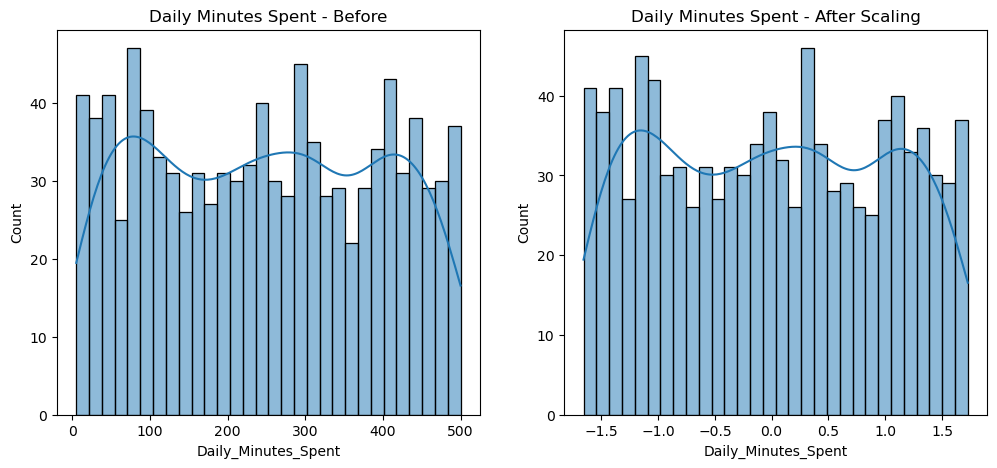

In [31]:
def plot_feature_dist(df_before, df_after, feature, title_prefix):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[feature], kde=True, bins=30)
    plt.title(f"{title_prefix} - Before")
    plt.subplot(1, 2, 2)
    sns.histplot(df_after[feature], kde=True, bins=30)
    plt.title(f"{title_prefix} - After Scaling")
    plt.show()

# Example for usage dataset on 'Daily_Minutes_Spent'
if 'Daily_Minutes_Spent' in df_usage.columns:
    # Reload unscaled to compare before scaling (or keep a copy before)
    df_usage_before = pd.read_csv(os.path.join(folder_4, file_4))
    plot_feature_dist(df_usage_before, df_usage, 'Daily_Minutes_Spent', 'Daily Minutes Spent')


In [37]:
print("Columns in dataframe:")
print(df_addiction.columns.tolist())


Columns in dataframe:
['Student_ID', 'Age', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Gender_male', 'Academic_Level_high school', 'Academic_Level_undergraduate', 'Affects_Academic_Performance_yes', 'Relationship_Status_in relationship', 'Relationship_Status_single']


In [39]:
# Columns list from your dataset
all_columns = [
    'Student_ID', 'Age', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 
    'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 
    'Addicted_Score', 'Gender_male', 'Academic_Level_high school', 'Academic_Level_undergraduate', 
    'Affects_Academic_Performance_yes', 'Relationship_Status_in relationship', 'Relationship_Status_single'
]

# Target variable
target_col = 'Addicted_Score'

# Filter for numerical and relevant columns (excluding IDs and non-numeric 'Country' and 'Most_Used_Platform')
feature_cols = [
    'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 
    'Conflicts_Over_Social_Media', 'Gender_male', 'Academic_Level_high school', 
    'Academic_Level_undergraduate', 'Affects_Academic_Performance_yes', 
    'Relationship_Status_in relationship', 'Relationship_Status_single'
]

# Prepare dataset
df_model = df_addiction[feature_cols + [target_col]].copy()

# If target is continuous (score), and you want classification, consider binning it.
# For example, bin addicted score into categories (0: low, 1: high):
# Uncomment if needed:
# df_model['Addicted_Score'] = pd.cut(df_model['Addicted_Score'], bins=[-np.inf, 5, np.inf], labels=[0,1]).astype(int)

# Separate features and target
X = df_model[feature_cols]
y = df_model[target_col]

print("Features used:", feature_cols)
print("Target variable:", target_col)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Features used: ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Gender_male', 'Academic_Level_high school', 'Academic_Level_undergraduate', 'Affects_Academic_Performance_yes', 'Relationship_Status_in relationship', 'Relationship_Status_single']
Target variable: Addicted_Score
Feature matrix shape: (705, 11)
Target vector shape: (705,)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split dataset into train (70%), validation (15%), test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R²: {r2:.4f}")

# If you want to calculate a Kaggle metric, please share what it is exactly,
# and I can help implement it here.


Validation RMSE: 0.1642
Validation R²: 0.9773


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

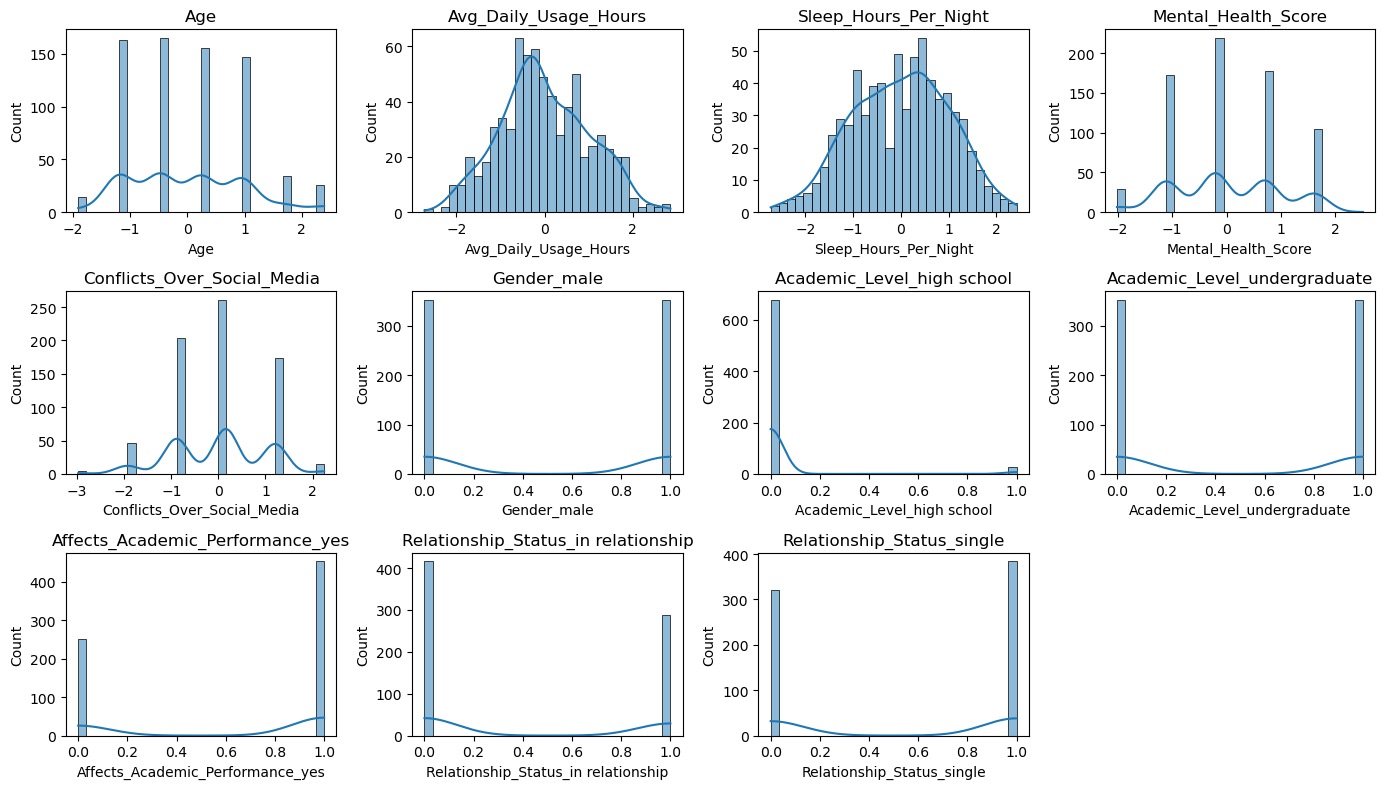

In [44]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_model[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

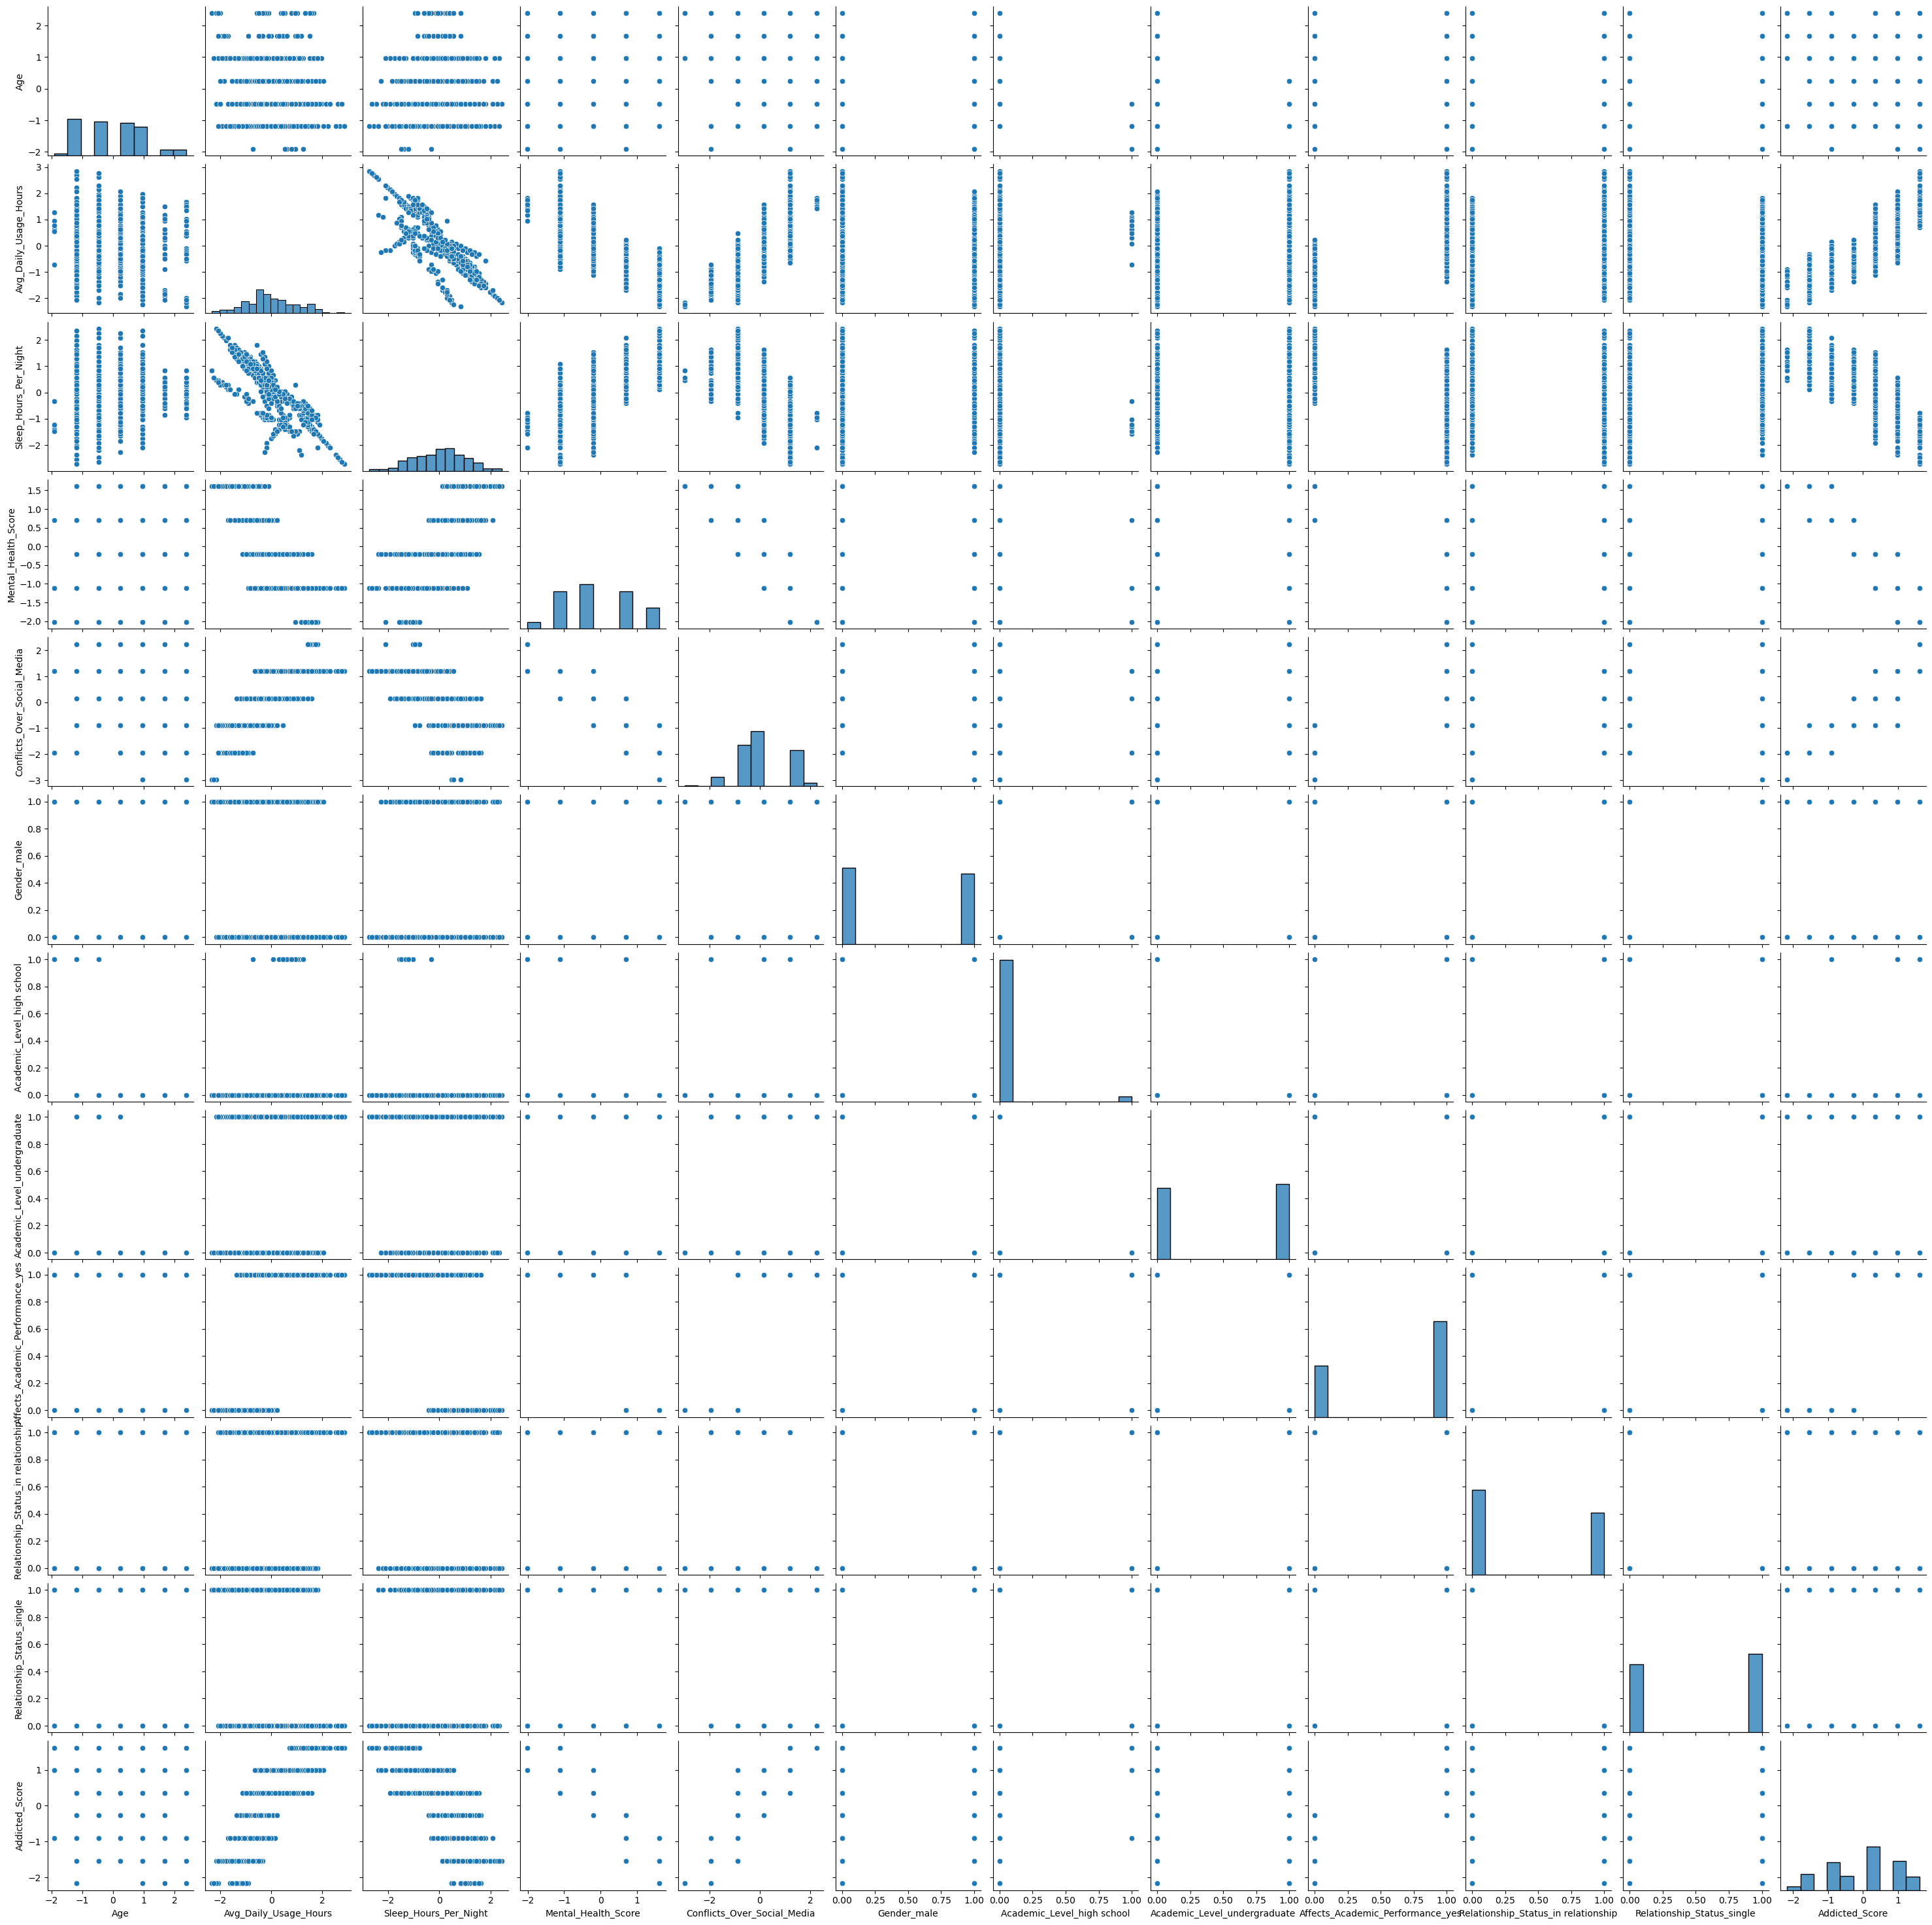

In [43]:
# Use a subset to keep it fast, or all features if you want
sns.pairplot(df_model.sample(min(500, len(df_model))), vars=feature_cols + [target_col])
plt.show()


Top 5 features most correlated with target: ['Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Affects_Academic_Performance_yes', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(val

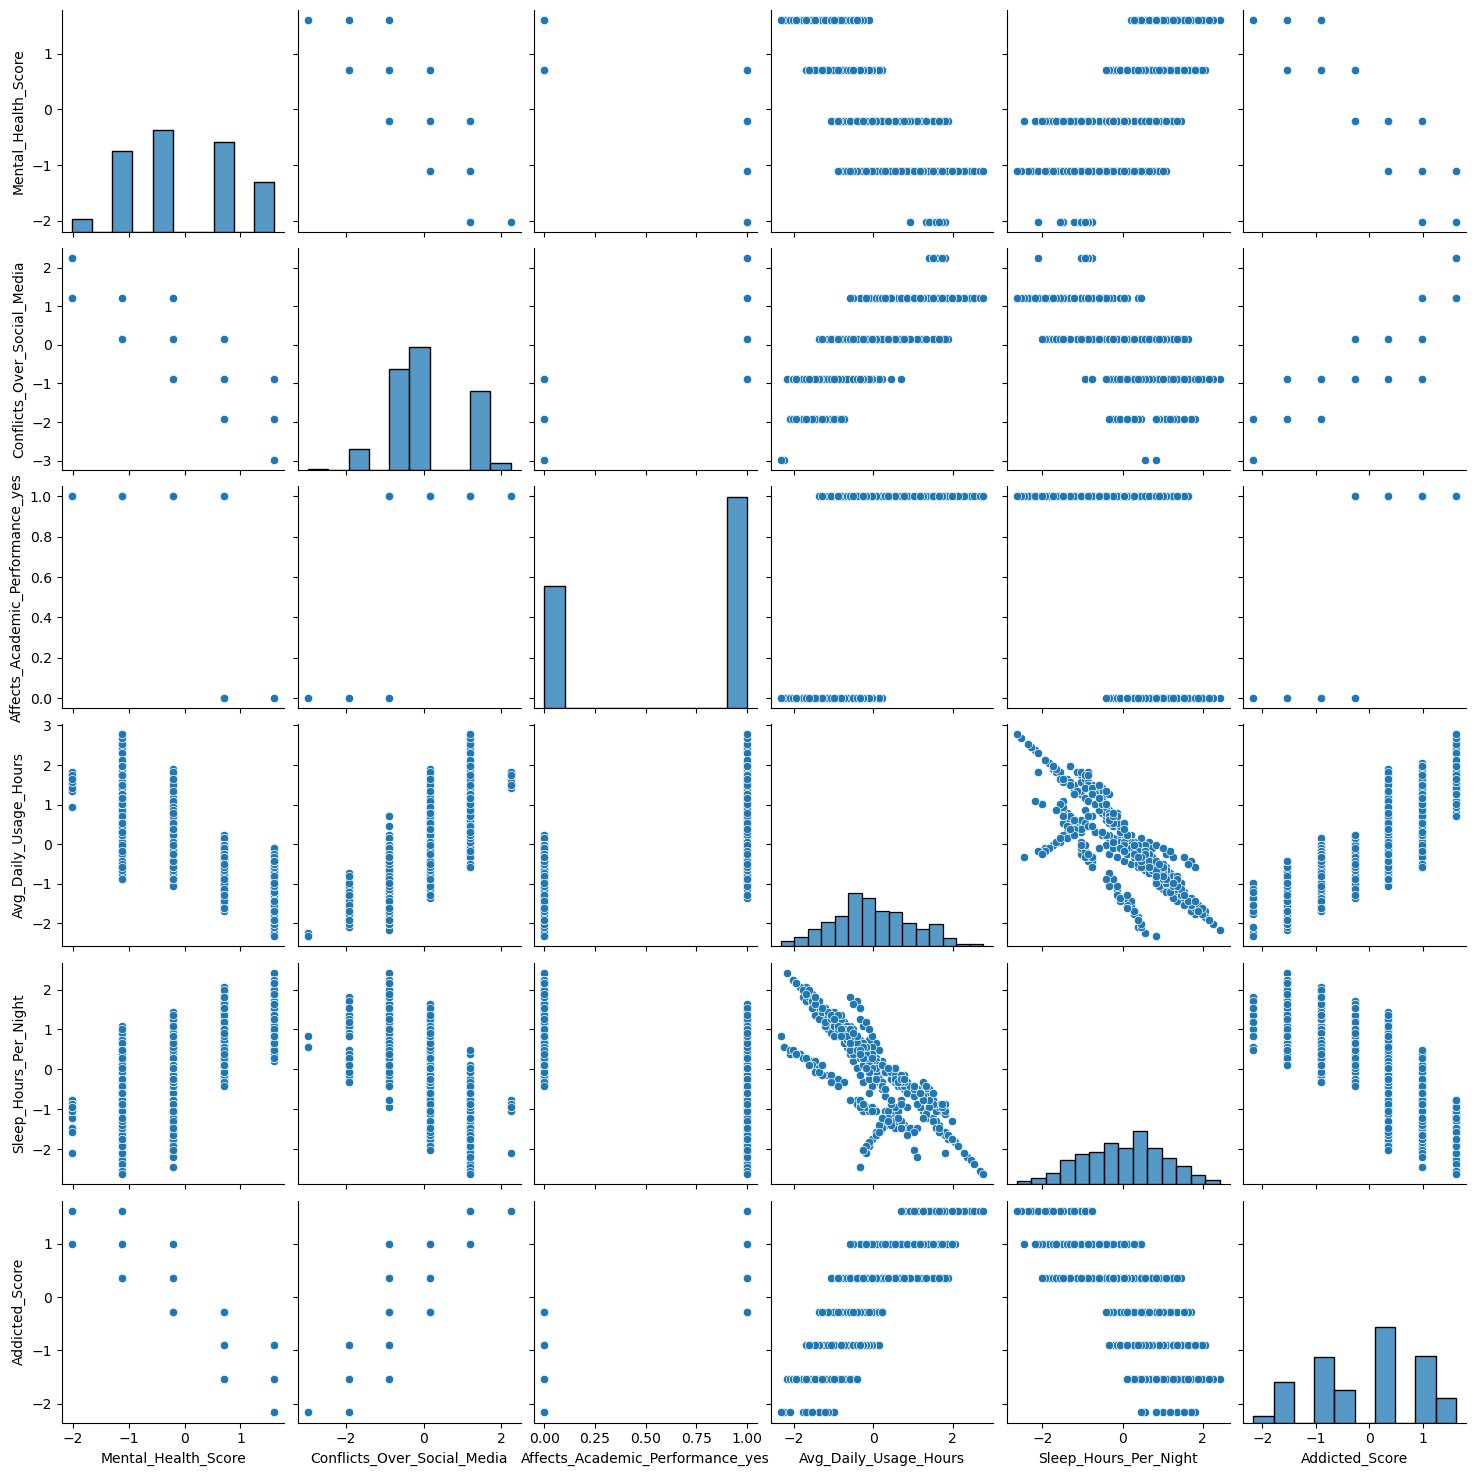

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute absolute correlations with the target
corr_matrix = df_model[feature_cols + [target_col]].corr()
target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)

# Select top 5 features (excluding the target itself)
top_features = target_corr.index.drop(target_col)[:5].tolist()

print("Top 5 features most correlated with target:", top_features)

# Plot pairplot with top 5 features + target
plot_vars = top_features + [target_col]

sns.pairplot(df_model.sample(min(500, len(df_model))), vars=plot_vars)
plt.show()


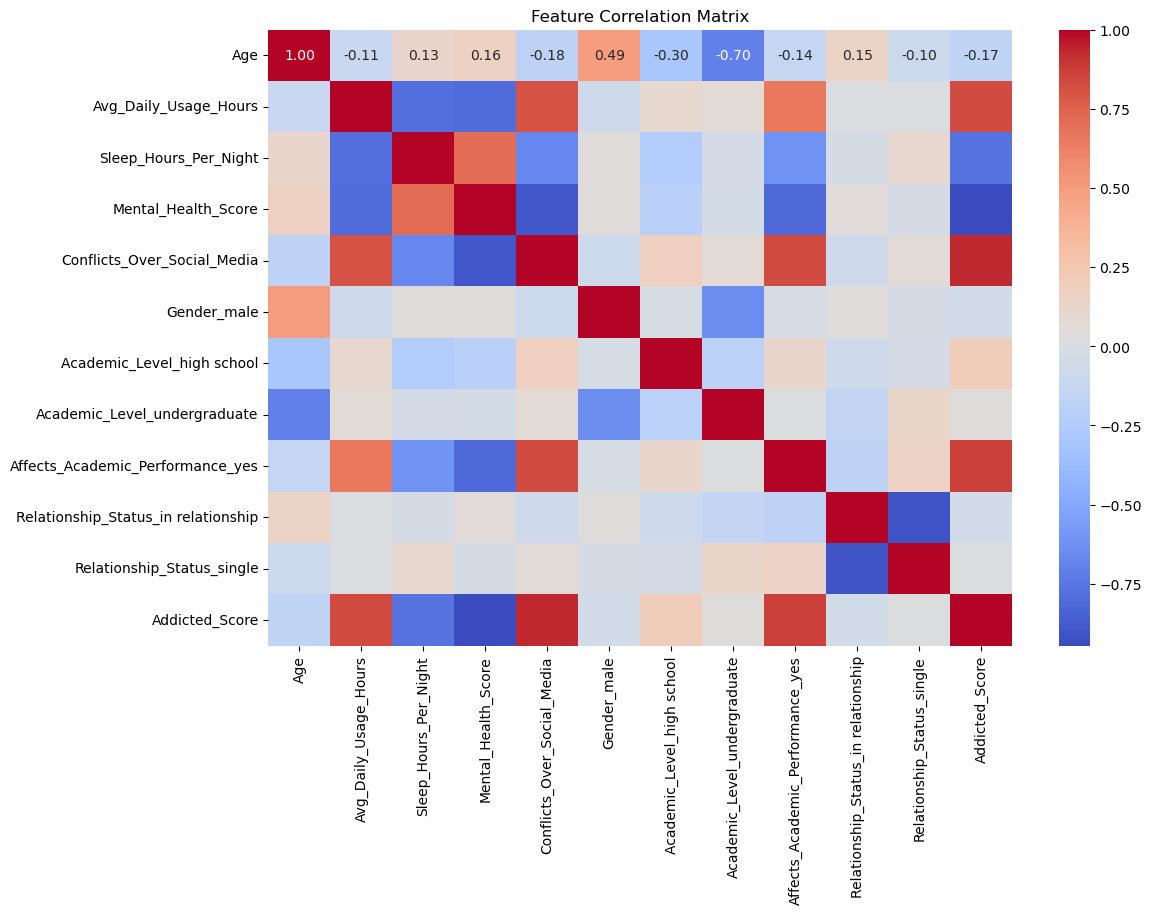

In [49]:
plt.figure(figsize=(12, 8))
corr = df_model[feature_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_sizes = [0.5, 0.7, 0.9]
results = []

for train_size in train_sizes:
    # Split full data into train and test (15% fixed test set)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42
    )
    
    # Then split train_val into train and val with proportion based on train_size
    val_size = 1 - train_size
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(1 - 0.15), random_state=42
    )
    
    print(f"Training with {train_size*100:.0f}% of available training data:")
    print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on validation
    y_val_pred = model.predict(X_val)
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)

    print(f"Validation RMSE: {rmse:.4f}, R²: {r2:.4f}\n")

    results.append({'train_size': train_size, 'rmse': rmse, 'r2': r2})

# Optional: summarize results
import pandas as pd
print(pd.DataFrame(results))


Training with 50% of available training data:
Train set: (246, 11), Validation set: (353, 11), Test set: (106, 11)
Validation RMSE: 0.2163, R²: 0.9549

Training with 70% of available training data:
Train set: (387, 11), Validation set: (212, 11), Test set: (106, 11)
Validation RMSE: 0.1799, R²: 0.9697

Training with 90% of available training data:
Train set: (528, 11), Validation set: (71, 11), Test set: (106, 11)
Validation RMSE: 0.1758, R²: 0.9736

   train_size      rmse        r2
0         0.5  0.216282  0.954938
1         0.7  0.179933  0.969736
2         0.9  0.175832  0.973575


In [61]:
# Train final model on 85% of the data
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_val_full, y_train_val_full)

# Predict on the held-out test set
final_predictions = final_model.predict(X_test_final)

# Create submission DataFrame without Student_ID
submission_df = pd.DataFrame({
    'Predicted_Addicted_Score': final_predictions
})

# Save to CSV
submission_df.to_csv("social_media_addiction_predictions.csv", index=False)
print("✅ Submission file 'social_media_addiction_predictions.csv' created successfully.")
print(submission_df.head())


✅ Submission file 'social_media_addiction_predictions.csv' created successfully.
   Predicted_Addicted_Score
0                 -0.905955
1                  0.361353
2                 -0.937480
3                  0.355048
4                 -1.612116


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Split full dataset (again if not done already)
X_train_val_full, X_test_final, y_train_val_full, y_test_final = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# 2. Train final model
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_val_full, y_train_val_full)

# 3. Predict on test set
predictions = final_model.predict(X_test_final)

# 4. Round predictions
rounded_predictions = np.round(predictions, 2)

# 5. Optional: Confidence interval estimate using percentiles from individual trees
all_tree_predictions = np.stack([tree.predict(X_test_final) for tree in final_model.estimators_])
lower_bounds = np.percentile(all_tree_predictions, 10, axis=0)
upper_bounds = np.percentile(all_tree_predictions, 90, axis=0)

# 6. Build final DataFrame
submission_df = pd.DataFrame({
    'Predicted_Addicted_Score': rounded_predictions,
    'Lower_90%_Bound': np.round(lower_bounds, 2),
    'Upper_90%_Bound': np.round(upper_bounds, 2)
})

# 7. Save to CSV
submission_df.to_csv("social_media_addiction_predictions.csv", index=False)
print("✅ Final submission file saved as 'social_media_addiction_predictions.csv'")
print(submission_df.head())


✅ Final submission file saved as 'social_media_addiction_predictions.csv'
   Predicted_Addicted_Score  Lower_90%_Bound  Upper_90%_Bound
0                     -0.91            -0.91            -0.91
1                      0.36             0.36             0.36
2                     -0.94            -0.91            -0.91
3                      0.36             0.36             0.36
4                     -1.61            -2.17            -1.54


C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fi